In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df_price = pd.read_csv("get_around_pricing_project.csv")
df_price = df_price.drop(columns=['Unnamed: 0'])

In [3]:
df_price.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [4]:
df_price

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [5]:
numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Separate target variable Y from features X
target_variable = 'rental_price_per_day'
X = df_price.drop(target_variable, axis=1)
Y = df_price[target_variable]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state=0)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Predictive models

- We want to predict the prize of a car from their characteristics.
- The tarject column is a continuous value: rental price per day.
- We will perform regression models to predict the prizes: linear regression and random forest regressor

### Linear regressor

In [7]:
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

r2 =r2_score(Y_test,Y_pred)
print("R2 score:" , r2)

Mean Squared Error: 322.3852358045389
R2 score: 0.7134414273881677


- The average squared difference between the actual and predicted rental prices is of 299.89.
- The R2 score is 0.73 which means that 73.2% of the variance in the rental prices is explained by the linear regression model.

c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8974.31213441625, tolerance: 107.62876157024792
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.65609678748297, tolerance: 103.72995702479336
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6883.900556646055, tolerance: 116.8174541322314
  model = cd_fast.sparse_enet_coordinate_descent(


Best Hyperparameters: {'alpha': 0.001}
Mean Squared Error (Train) - Lasso: 266.0362820172666
R2 score (Train) - Lasso: 0.7646202226953555
Mean Squared Error (Test): 322.3852358045389
R2 score (Test): 0.7134414273881677


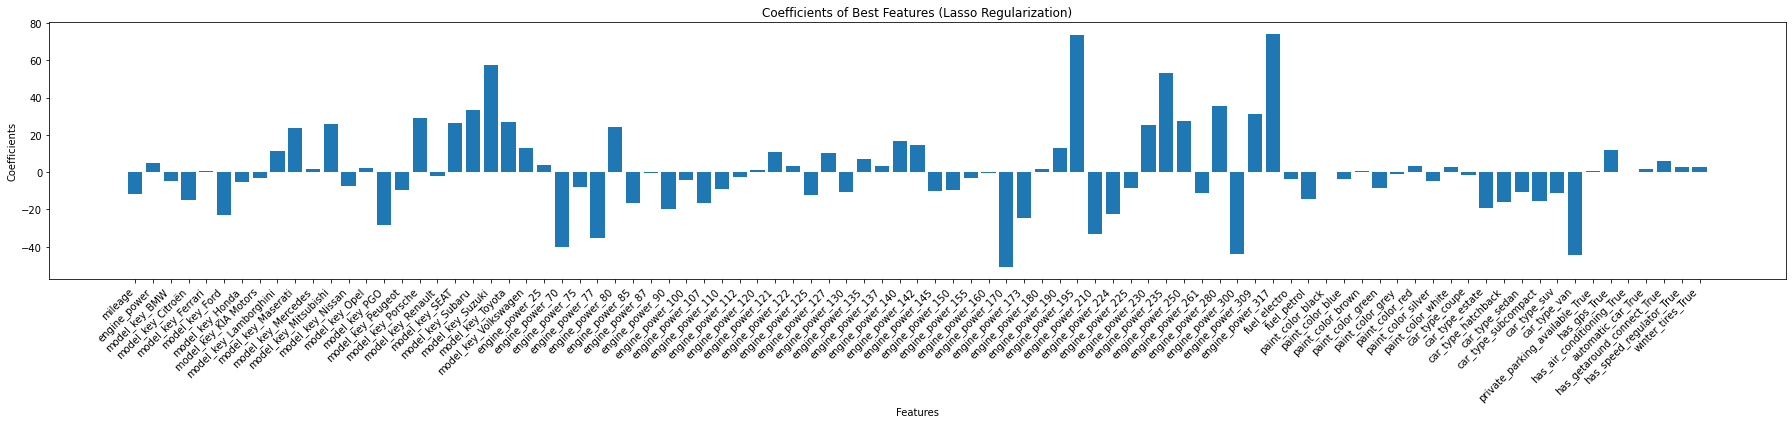

In [8]:
# Regularization of the model with Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=3)
grid_search.fit(X_train, Y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
best_logreg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Train a Lasso regression model with the best alpha value
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_lasso = best_lasso_model.predict(X_test)
Y_train_lasso = best_lasso_model.predict(X_train)

# Evaluate the model
mse_lasso_train = mean_squared_error(Y_train, Y_train_lasso)
print("Mean Squared Error (Train) - Lasso:", mse_lasso_train)
r2_lasso_train = r2_score(Y_train, Y_train_lasso)
print("R2 score (Train) - Lasso:", r2_lasso_train)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (Test):", mse)
r2 =r2_score(Y_test,Y_pred)
print("R2 score (Test):" , r2)

# Retrieve coefficients of the features
coefficients = best_lasso_model.coef_

# Select features based on non-zero coefficients
selected_features_indices = np.where(coefficients != 0)[0]
# Get the names of categorical features after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
encoded_cat_features = cat_encoder.get_feature_names_out(input_features=categorical_features)

# Combine numeric and encoded categorical feature names
all_feature_names = numeric_features + list(encoded_cat_features)

# Retrieve coefficients of selected features
selected_features = np.array(all_feature_names)[selected_features_indices]
selected_coefficients = coefficients[selected_features_indices]

# Plot the coefficients
plt.figure(figsize=(25, 6))
plt.bar(selected_features, selected_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Best Features (Lasso Regularization)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
#to check the standard deviation of the crosvalidation  
scores = cross_val_score(grid_search, X_train, Y_train, cv=3)
print('The cross-validated accuracy is :', scores.mean())
print('The standard deviation is :', scores.std())

c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2341.3887825737766, tolerance: 67.30515751937983
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3507.967799194652, tolerance: 75.57306702786377
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2185.3380324215977, tolerance: 68.21232961240308
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\linear_model\_coord

The cross-validated accuracy is : 0.6987526513215032
The standard deviation is : 0.04210746268393455


- The model overfits train r2 score = 0.76 --> test r2 score 0.71
- The Lasso regularization does not increase the R2 score we obtained  0.71 as for the linear regressor
- The graph shows all the importance of each feature to predict the target car prize, they can have a  positive coeficient if it affects positively the prize, negative or 0. Those with 0 o close to 0 coefficient are not important for prize prediction.

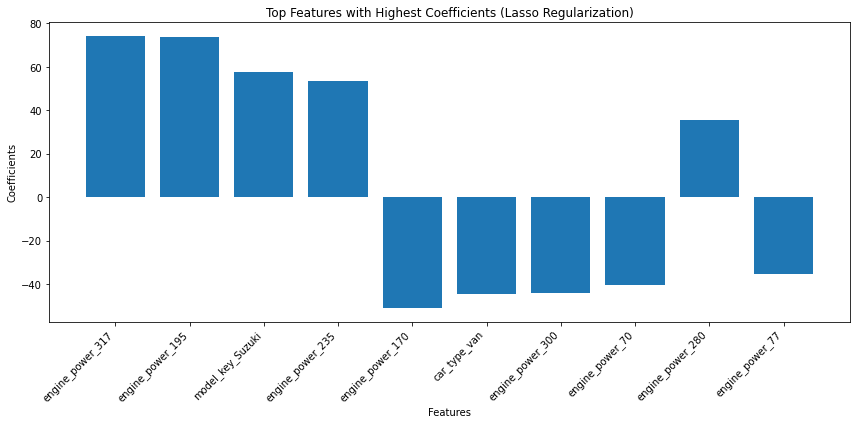

In [10]:
abs_coefficients = np.abs(selected_coefficients)

# Sort coefficients and features based on absolute coefficient values
sorted_indices = abs_coefficients.argsort()[::-1]
sorted_features = selected_features[sorted_indices]
sorted_coefficients = selected_coefficients[sorted_indices]

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(sorted_features[:10], sorted_coefficients[:10])
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top Features with Highest Coefficients (Lasso Regularization)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- These are the features with more importance according to the Lasso regularization for prize prediction.
- The plot show the features that have a higher impact on the prizes of the car: directly proportional those who are positive or inversively proportional, those who are negative.

### Random forest regressor

In [11]:
rf_regressor = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Perform GridSearch
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_rf_regressor = grid_search.best_estimator_
Y_test_pred = best_rf_regressor.predict(X_test)
Y_train_pred = best_rf_regressor.predict(X_train)

# Evaluate the model
mse_rf_train = mean_squared_error(Y_train, Y_train_pred)
print("Mean Squared Error (Train) - Lasso:", mse_rf_train)
r2_rf_train = r2_score(Y_train, Y_train_pred)
print("R2 score (Train) - Lasso:", r2_rf_train)

mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)
print("Mean Squared Error(Test):", mse)
print("R2 Score (Test):", r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (Train) - Lasso: 79.3357154379752
R2 score (Train) - Lasso: 0.9298064801894832
Mean Squared Error(Test): 311.32675917681877
R2 Score (Test): 0.7232709757848012


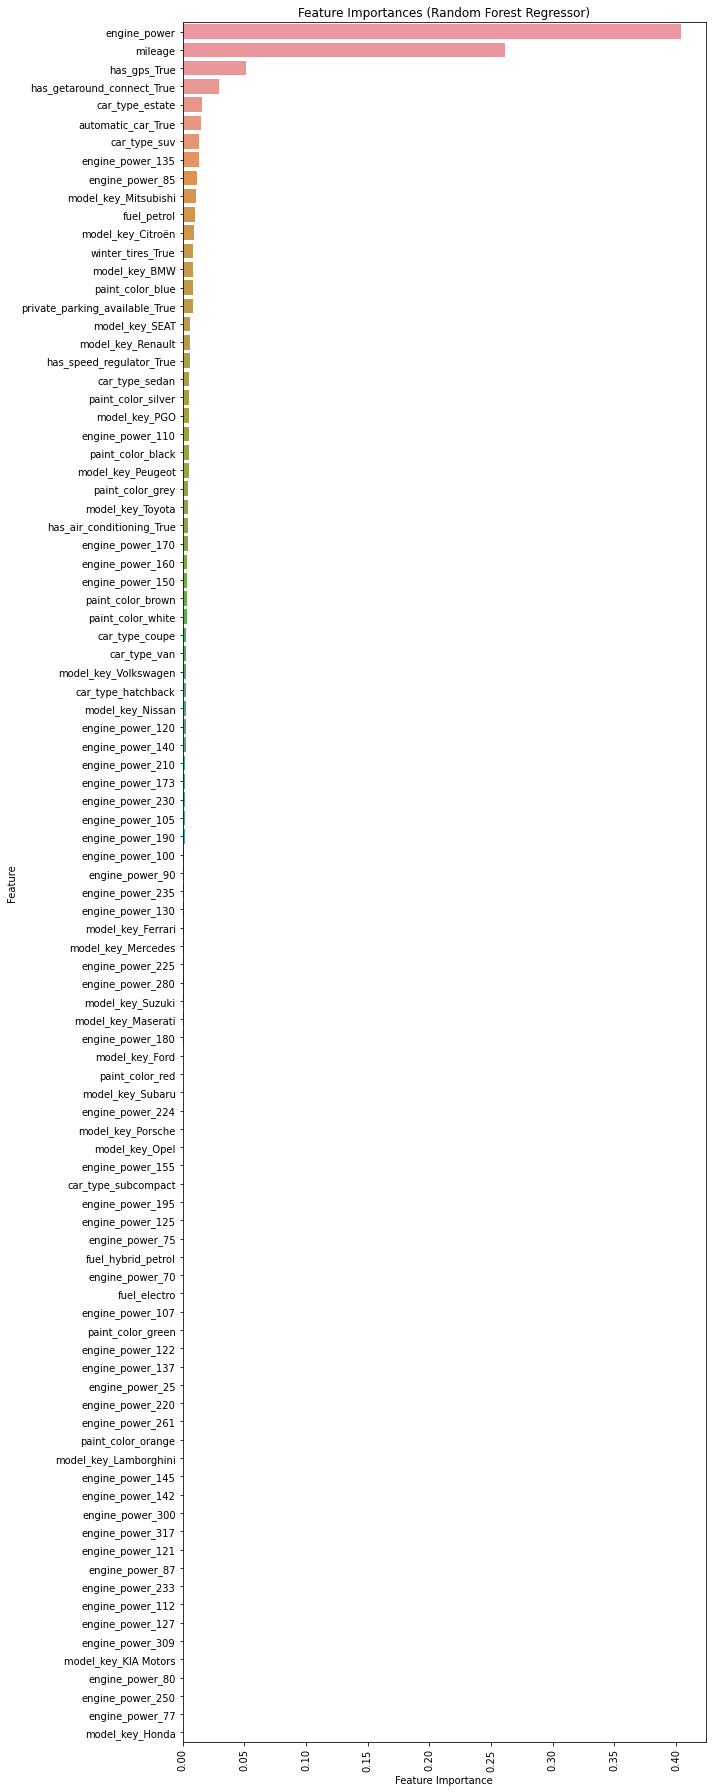

In [12]:
importances = best_rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(all_feature_names)

# Plot the feature importances with feature names
plt.figure(figsize=(10, 25))
plt.title("Feature Importances (Random Forest Regressor)")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The model overfits in train r2score = 0.93 --> test r2score = 0.723.
- The model with best r2 score is the random forest regressor with Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
- This model have a better performance than the linear regression with a test R2 Score: 0.723 and Mean Squared Error: 311.32675917681877.
- We then use it to train the entire dataset and export.
- The graph shows a ranking of the most important features for predicting the car prizes, being on the top engine power an mileage (number of km), followed by having connectivity and gps.

In [13]:
# train the final model on the entire dataset X and Y
X = preprocessor.fit_transform(X)
best_rf_regressor .fit(X, Y)

RandomForestRegressor(max_depth=20, min_samples_split=5)

In [14]:
# Save the trained model
joblib.dump(best_rf_regressor , 'random_forest_regressor_model.pkl')
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']